In [1]:
#tables
import pandas as pd
from pandas_profiling import ProfileReport
from pandas.io.formats.style import Styler

#calculations
import numpy as np
from scipy import stats
from collections import Counter
from sklearn import metrics
import time
from scipy.stats import wilcoxon

#preprocessing
import sklearn
from sklearn.model_selection import KFold
#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import StandardScaler

#machine learning models
#from sklearn import linear_model
from sklearn import neighbors
#from sklearn import tree
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor


#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor

#plotting
import matplotlib.pyplot as plt
#import cufflinks as cf
#import plotly.offline
from matplotlib.pyplot import figure
#import seaborn as sns
from IPython.display import display, HTML

In [2]:
data = pd.read_excel('prepared_dataset.xls')
data = data.rename(columns={'GRADE.TOTAL': 'NoticeSound'})
data.shape
data.describe()

,Unnamed: 0,occured,artistgender_Female,artistgender_Male,artistgender_Mixed,group/solo_Duo,group/solo_Duo/Group,group/solo_Solo,vocal/instrumental_Instrumental,vocal/instrumental_Vocal,...,DR,RH,RHX,PG,VVN,VVX,NG,UG,NoticeSound,S_popularity
count,2930.00000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2715.000000
mean,1464.50000,5.767918,0.248123,0.550171,0.121843,0.112969,0.100000,0.704096,0.031741,0.891468,...,19.227489,23.616568,9.443062,10146.285588,39.007265,76.857894,6.000127,77.911984,6.878703,58.369429
std,845.96247,4.865349,0.431997,0.497561,0.327160,0.316609,0.300051,0.456526,0.175339,0.311105,...,15.844524,21.363160,8.834142,85.988932,13.868052,6.031047,1.528069,10.731024,0.259086,22.057024
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.285714,-0.285714,9919.500000,3.285714,54.714286,1.714286,48.571429,5.500000,0.000000
25%,732.25000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,3.714286,2.571429,1.571429,10080.428571,29.714286,74.571429,5.142857,69.285714,6.700000,44.000000
50%,1464.50000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,17.571429,21.571429,7.428571,10167.857143,40.714286,78.285714,6.428571,80.285714,6.900000,61.000000
75%,2196.75000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,31.571429,38.000000,14.428571,10206.714286,47.428571,81.428571,7.142857,86.142857,7.100000,77.000000
max,2929.00000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,74.285714,87.428571,34.714286,10306.571429,69.142857,83.000000,7.800000,94.142857,7.600000,94.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 228 entries, Unnamed: 0 to TitelArtiest
dtypes: float64(198), int64(29), object(1)
memory usage: 5.1+ MB


<h2>Define feature sets</h2>

In [4]:
gracenote_columns=  ['artistgender_Female', 'artistgender_Male', 'artistgender_Mixed', 'group/solo_Duo', 
                     'group/solo_Duo/Group', 'group/solo_Solo', 'vocal/instrumental_Instrumental', 'vocal/instrumental_Vocal', 
                     'years_old', 'genre_Adult', 'genre_Alternative', 'genre_British', 'genre_Contemporary', 'genre_Country', 
                     'genre_Crossover', 'genre_Dance', 'genre_Electronic', 'genre_Folk', 'genre_House', 'genre_Indie', 
                     'genre_Modern', 'genre_Nederhop', 'genre_Nederpop', 'genre_Pop', 'genre_Post-Punk', 'genre_R&B', 
                     'genre_Rap', 'genre_Revival', 'genre_Rock', 'genre_Singer-Songwriter', 'genre_Urban', 'mood_Abstract', 
                     'mood_Alienated', 'mood_Beat', 'mood_Bittersweet', 'mood_Brooding', 'mood_Building', 'mood_Cool', 
                     'mood_Dark', 'mood_Desirous', 'mood_Dramatic', 'mood_Dreamy', 'mood_Driving', 'mood_Edgy', 'mood_Emotion', 
                     'mood_Energetic', 'mood_Energized', 'mood_Epic', 'mood_Expressive', 'mood_Fiery', 'mood_Fun', 
                     'mood_Glossy', 'mood_Gritty', 'mood_Groovy', 'mood_Heartfelt', 'mood_Heavy', 'mood_Hope', 'mood_Intense', 
                     'mood_Intimate', 'mood_Jaunty', 'mood_Kick-Back', 'mood_Light', 'mood_Loud', 'mood_Melancholy', 
                     'mood_Party', 'mood_Passionate', 'mood_Positive', 'mood_Power', 'mood_Pulsing', 'mood_Rhythm', 
                     'mood_Sad', 'mood_Sensitive', 'mood_Sensual', 'mood_Serious', 'mood_Sexy', 'mood_Slow', 'mood_Soaring', 
                     'mood_Soulful', 'mood_Stomping', 'mood_Strolling', 'mood_Strong', 'mood_Strumming', 'mood_Whatever', 
                     'mood_Wistful', 'origin_England', 'origin_London', 'origin_Los Angeles', 'origin_Nashville', 
                     'origin_Netherlands', 'origin_New York City', 'origin_United States', 'tempos']

radio_columns=  ['total_plays_Q', 'total_plays_538', 'total_plays_3FM']

musical_features=  ['chroma_stft_mean', 'chroma_stft_var', 'chroma_cqt_mean', 'chroma_cqt_var', 'chroma_cens_mean', 
                    'chroma_cens_var', 'melspectrogram_mean', 'melspectrogram_var', 'mfcc_mean', 'mfcc_var', 'rms_mean', 
                    'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 
                    'spectral_bandwidth_var', 'contrast_mean', 'contrast_var', 'flatness_mean', 'flatness_var', 
                    'spectral_rolloff_mean', 'spectral_rolloff_var', 'poly_features_0_mean', 'poly_features_0_var', 
                    'poly_features_1_mean', 'poly_features_1_var', 'poly_features_2_mean', 'poly_features_2_var', 
                    'poly_features_3_mean', 'poly_features_3_var', 'tonnetz_5x_mean', 'tonnetz_5x_var', 'tonnetz_5y_mean', 
                    'tonnetz_5y_var', 'tonnetz_m3x_mean', 'tonnetz_m3x_var', 'tonnetz_m3y_mean', 'tonnetz_m3y_var', 
                    'tonnetz_M3x_mean', 'tonnetz_M3x_var', 'tonnetz_M3y_mean', 'tonnetz_M3y_var', 'zero_crossing_rate_mean', 
                    'zero_crossing_rate_var', 'tempogram_mean', 'tempogram_var', 'fourier_tempogram_var', 'delta_mean', 
                    'delta_var', 'mel_to_stft_mean', 'mel_to_stft_var', 'onset_detect_median', 'onset_detect_var', 
                    'onset_backtrack_mean', 'onset_backtrack_var', 'onset_strength_mean', 'onset_strength_var', 
                    'onset_strength_multi_mean', 'onset_strength_multi_var', 'beat_track', 'plp_mean', 'plp_var', 'tempo', 
                    'interp_harmonics_mean', 'interp_harmonics_var', 'estimate_tuning', 'piptrack_mean', 'piptrack_var', 
                    'recurrance_matrix_mean', 'recurrance_matrix_var']

lyrical_columns=  ['nr_of_words', 'nr_of_lines', 'avg_words_per_line', 'avg_char_per_sentence', 'neg_sentscore', 
                   'neu_sentscore', 'pos_sentscore', 'tot_sentscore', 'neg_sentscore_per_sentence', 
                   'neu_sentscore_per_sentence', 'pos_sentscore_per_sentence', 'tot_sentscore_per_sentence', 
                   'taal_en', 'taal_nl']

spotify_columns=  ['S_tracks_on_album', 'S_explicit', 'S_duration_ms', 'S_album_type_album', 'S_album_type_single']

youtube_columns=  ['YT_views', 'YT_likes', 'YT_dislikes', 'YT_comments', 'YT_likes_per_view', 'YT_dislikes_per_view', 
                   'YT_like_dislike_ratio', 'YT_views_per_day', 'YT_likes_per_day', 'YT_dislikes_per_day', 
                   'YT_comments_per_day']

iTunes_columns=  ['iT_albumPrice', 'iT_trackPrice', 'iT_expl_explicit', 'iT_expl_notExplicit', 'iT_genre_Alternative', 
                  'iT_genre_Dance', 'iT_genre_Electronic', 'iT_genre_Hip-Hop/Rap', 'iT_genre_Pop', 'iT_genre_R&B/Soul']

weather_columns=  ['DDVEC', 'FHVEC', '   FG', '  FHX', '  FHN', '  FXX', '   TG', '   TN', '   TX', '   SQ', '   DR', 
                   '   RH', '  RHX', '   PG', '  VVN', '  VVX', '   NG', '   UG']

In [5]:
ind_columns=['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns
dep_columns = ['NoticeSound','S_popularity']

<h3>Drop unnecessary columns</h3>

In [6]:
print(data.shape)
data = data[dep_columns+ind_columns+['TitelArtiest']]
print(data.shape)

(2930, 228)
(2930, 227)


<h2>Split data in 80/20 cv_train and final_test set</h2>
The train set will be used for cross-validation. That is the reason it is called cv_train, because in the cross validation smaller train sets are used.

Make sure the same song does not occur in the cv_train and final_test set.

In [7]:
unique_songs = data[['TitelArtiest']].drop_duplicates()

cv_train, final_test = \
              np.split(unique_songs.sample(frac=1, random_state=42), 
                       [int(.8*len(unique_songs))])

cv_train = data[data['TitelArtiest'].isin(cv_train['TitelArtiest'])]
final_test = data[data['TitelArtiest'].isin(final_test['TitelArtiest'])]

print("cv_train = ",cv_train.shape[0])#+test.shape[0])
print("final_test = ",final_test.shape[0])#+test.shape[0])

cv_train =  2354
final_test =  576


<h2>Some empty cells exist. Fill them with the mean value of their column, so they won't cause problems while running the model<h2>

In [8]:
data.fillna(data.mean(), inplace=True)
cv_train.fillna(cv_train.mean(), inplace=True)
final_test.fillna(final_test.mean(), inplace=True)

C:\Users\Eigenaar\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<h2>Check for multicollinearity within feature sets</h2>
Since the objective of this study is to find the importance of different feature sets in predicting the NoticeSound score, we can not delete a column if there are multicollinearity issues between variables from different feature sets. How ever, we can check for multicollinearity within every feature set.

<font color='red'><h1>Question: How to deal with multicollinearity? if there is a dummy variable for male / female / non-binary, the variables for male and female will be almost the opposite, since there are not so many non-binary artists. Should I just drop the male or female column? Also, there is a lot of overlap between the total plays on Q-music and 538. Is this a problem?</h1></font>

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# A rule of thumb for interpreting the variance inflation factor:
# 1 = not correlated.
# Between 1 and 5 = moderately correlated.
# Greater than 5 = highly correlated.


feature_sets = [['occured']+gracenote_columns,
                ['occured']+radio_columns,
                ['occured']+musical_features,
                ['occured']+lyrical_columns,
                ['occured']+spotify_columns,
                ['occured']+youtube_columns,
                ['occured']+iTunes_columns,
                ['occured']+weather_columns]

for feature_set in feature_sets:
    num_data = data[feature_set]
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = num_data.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(num_data.values, i)
                              for i in range(len(num_data.columns))]

    (print(vif_data[vif_data['VIF']>5]))
    print("")

                            feature         VIF
1               artistgender_Female  117.432699
2                 artistgender_Male  257.639647
3                artistgender_Mixed   58.533889
4                    group/solo_Duo   30.173279
5              group/solo_Duo/Group   27.902178
6                   group/solo_Solo  182.468176
7   vocal/instrumental_Instrumental   22.115806
8          vocal/instrumental_Vocal  675.003166
10                      genre_Adult    5.082370
11                genre_Alternative    5.614696
15                  genre_Crossover   12.145221
20                      genre_Indie    5.841160
24                        genre_Pop   14.591545
31                      genre_Urban   12.407148
37                    mood_Building    8.851421
39                        mood_Dark    8.670968
40                    mood_Desirous    5.475501
41                    mood_Dramatic    6.409256
44                        mood_Edgy    6.486044
48                        mood_Epic    6

<h2>Check for zero variance</h2>

In [10]:
data.var()[data.var()==0]

Series([], dtype: float64)

There are no columns with zero variance in the data set.

<h2>Description available features</h2>

<h3>Independent variables</h3>

- **NoticeSound** - A score given to a song in a certain week, based on swiping in an application. Varying from 5.5 to 7.6.
- **S_popularity** - A score based on the popularity on Spotify, varying from 0 to 94.

<h3>Dependent variables</h3>
<h4>Gracenote data</h4>

- **Artist information** - Gender, solo/duo/group, vocal / instrumental
- **Years old** - How many years ago the song was released.
- **Genre** - Dummy variables of 22 genres that occur at least 10 times. A song can have more than one genre.
- **Mood** - Dummy variables of the 53 moods that occur at least 10 times. A song can have more than one mood.
- **Origin** - Dummy variables of 7 different areas of origin, occuring at least 10 times.
- **Tempos** - The beats per minute of a song.

<h4>Radio data</h4>

- **total_plays_Q** - The number of times a song was played on Qmusic in 2020
- **total_plays_538** - The number of times a song was played on Radio538 in 2020
- **total_plays_3FM** - The number of times a song was played on 3FM in 2020

<h4>Musical features</h4>
70 musical features, taken from the 30th untill the 60th second of a song, since these tend to be representative. Most musical features contain a list of values, from these lists the mean value and variance are taken, since these tend to be useful metrics in hit prediction.

- **chroma_stft_mean**
- **chroma_stft_var**
- **chroma_cqt_mean**
- **chroma_cqt_var**
- **chroma_cens_mean**
- **chroma_cens_var**
- **melspectrogram_mean**
- **melspectrogram_var**
- **mfcc_mean**
- **mfcc_var**
- **rms_mean**
- **rms_var**
- **spectral_centroid_mean**
- **spectral_centroid_var**
- **spectral_bandwidth_mean**
- **spectral_bandwidth_var**
- **contrast_mean**
- **contrast_var**
- **flatness_mean**
- **flatness_var**
- **spectral_rolloff_mean**
- **spectral_rolloff_var**
- **poly_features_0_mean**
- **poly_features_0_var**
- **poly_features_1_mean**
- **poly_features_1_var**
- **poly_features_2_mean**
- **poly_features_2_var**
- **poly_features_3_mean**
- **poly_features_3_var**
- **tonnetz_5x_mean**
- **tonnetz_5x_var**
- **tonnetz_5y_mean**
- **tonnetz_5y_var**
- **tonnetz_m3x_mean**
- **tonnetz_m3x_var**
- **tonnetz_m3y_mean**
- **tonnetz_m3y_var**
- **tonnetz_M3x_mean**
- **tonnetz_M3x_var**
- **tonnetz_M3y_mean**
- **tonnetz_M3y_var**
- **zero_crossing_rate_mean**
- **zero_crossing_rate_var**
- **tempogram_mean**
- **tempogram_var**
- **fourier_tempogram_var**
- **delta_mean**
- **delta_var**
- **mel_to_stft_mean**
- **mel_to_stft_var**
- **onset_detect_median**
- **onset_detect_var**
- **onset_backtrack_mean**
- **onset_backtrack_var**
- **onset_strength_mean**
- **onset_strength_var**
- **onset_strength_multi_mean**
- **onset_strength_multi_var**
- **beat_track**
- **plp_mean**
- **plp_var**
- **tempo**
- **interp_harmonics_mean**
- **interp_harmonics_var**
- **estimate_tuning**
- **piptrack_mean**
- **piptrack_var**
- **recurrance_matrix_mean**
- **recurrance_matrix_var**

<h4>Lyrical features</h4>
From the 496 songs, 495 songs have lyrics available

- **nr_of_words** - The number of words in the lyrics
- **nr_of_lines** - The number of lines with text in the lyrics
- **avg_words_per_line** - The average number of words per line in the lyrics
- **avg_char_per_sentence** - The average characters per sentence in the lyrics

Sentiment scores, for every song there is a score on negative, neutral and positive sentiment, and the total score of these four. They are calculated in two ways: For the whole song or for every sentence in the song. In the last case, the average of all sentences is taken.

- **neg_sentscore**
- **neu_sentscore**
- **pos_sentscore**
- **tot_sentscore**
- **neg_sentscore_per_sentence**
- **neu_sentscore_per_sentence**
- **pos_sentscore_per_sentence**
- **tot_sentscore_per_sentence**

- **Language** - Only English and Dutch songs occured more than 10 times, so dummy variables are created for the Dutch and English language detected in a song

<h4>Spotify data</h4>

- **S_tracks_on_album** - The number of tracks on the album from the song
- **S_explicit** - A dummy varable whether a song contains explicit content or not
- **S_duration_ms** - The duration of a song on Spotify in miliseconds
- **S_album_type** - Dummy variables for whether the album type on Spotify is an album or a single

<h4>Youtube data</h4>

- **YT_views** - Total number of views the videoclip of a song has
- **YT_likes** - Total number of likes the videoclip has
- **YT_dislikes** - Number of dislikes the videoclip has
- **YT_comments** - Number of comments the videoclip has
- **YT_likes_per_view** - Number of likes / number of views
- **YT_dislikes_per_view** - Number of dislikes / number of views
- **YT_like_dislike_ratio** - Number of likes / number of dislikes
- **YT_views_per_day** - Number of views / days video is on youtube
- **YT_likes_per_day** - Number of likes / days video is on youtube
- **YT_dislikes_per_day** - Number of dislikes / days video is on youtube
- **YT_comments_per_day** - Number of comments / days video is on youtube

<h4>iTunes data</h4>

- **iT_albumPrice** - Price of the album of the song on iTunes (US dollars)
- **iT_trackPrice** - Price of the track of the song on iTunes (US dollars)
- **iT_expl_explicit** - Dummy variable whether a song is explicit
- **iT_expl_notExplicit** - Dummy variable whether a song is nog explicit
- **iT_genre** - Dummy variable of the 6 genres that occur more than 10 times in this set of songs (Alternative, Dance, Electronic, Hip-Hop/Rap, Pop, R&B/Soul)

<h4>Weather data</h4>

- **DDVEC** - Wind direction (degrees)
- **FHVEC** - Vector mean windspeed (in 0.1 m/s)
- **FG** - Daily mean windspeed (in 0.1 m/s) 
- **FHX** - Maximum hourly mean windspeed (in 0.1 m/s)
- **FHN** - Minimum hourly mean windspeed (in 0.1 m/s)
- **FXX** - Maximum wind gust (in 0.1 m/s)
- **TG** - Daily mean temperature in (0.1 degrees Celsius)
- **TN** - Minimum temperature (in 0.1 degrees Celsius)
- **TX** - Maximum temperature (in 0.1 degrees Celsius)
- **SQ** - Sunshine duration (in 0.1 hour) calculated from global radiation (-1 for <0.05 hour)
- **DR** - Precipitation duration (in 0.1 hour)
- **RH** - Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
- **RHX** - Maximum hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
- **PG** - Daily mean sea level pressure (in 0.1 hPa) calculated from 24 hourly values
- **VVN** - Minimum visibility
- **VVX** - Maximum visibility
- **NG** - Mean daily cloud cover 
- **UG** - Daily mean relative atmospheric humidity (in percents)

<h2>How are the scores divided?</h2>

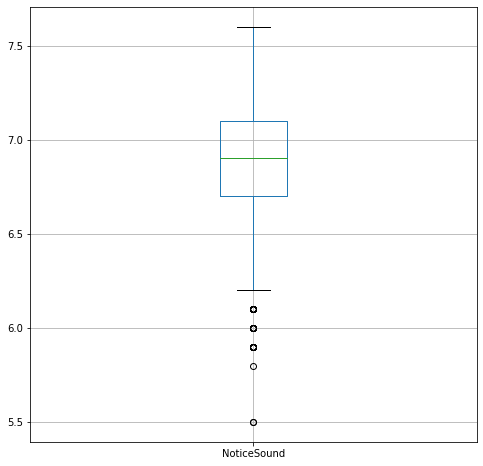

In [11]:
axes = data.boxplot(column='NoticeSound', figsize=(8,8),return_type='axes')

Outliers are not deleted, since they increase the variability of the scores and they are not strange values and don't seem to be the result of mistakes.

<AxesSubplot:>

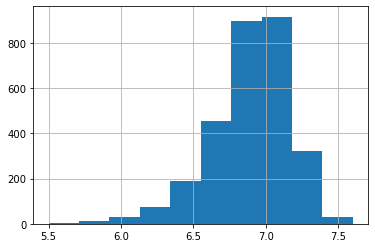

In [12]:
data['NoticeSound'].hist()

In [13]:
print(f"NoticeSound shapiro statistic = {round(stats.shapiro(data['NoticeSound'])[0],2)}, \
p-value= {round(stats.shapiro(data['NoticeSound'])[1],2)}")


NoticeSound shapiro statistic = 0.95, p-value= 0.0


For the shapiro statistic, the p value < 0.05, so the null hypothesis that the NoticeSound score is normally distributed is rejected, even though the distribution seems to be normal.

<h2>Test how well different regressors can predict the NoticeSound score, using all feature sets</h2>

<font color='red'><h1>Question: Do I compute R2 in the right way? the built-in function to calculate the R2 only gives negative values and the values as I calculate them at the moment seem more correct</h1></font>

In [14]:
%%time
def evaluate(input_model, data, folds, dep_var, ind_columns, scaled, plotting, assessing):
    '''Takes:
    - A model
    - A dataset
    - The number of k-folds
    - The dependent variable
    - The independent columns
    - A boolean value that defines whether the evaluation metrics are on scaled data
    - A boolean value that defines whether a plot should be made or not
    - A boolean value that defines whether the model should be assessed or not
    Returns:
    - The r2 value for this combination
    - The MAE value for this combination
    - The pearson correlation and its power
    - The average time in seconds to complete one fold'''
    
    r2_list = []
    mae_list = []
    pearson_rlist = []
    pearson_plist = []
    time_list = []
    kf = KFold(n_splits=folds) # r2 stabelizes at 15 kfold for most regressors, at 5 kfold for RandomForest, SVR and NuSVR
    
    unique_songs = data[['TitelArtiest']].drop_duplicates()
    for train_index, test_index in kf.split(unique_songs):
        train = unique_songs.iloc[train_index]
        test = unique_songs.iloc[test_index]
        train = data[data['TitelArtiest'].isin(train['TitelArtiest'])]
        test = data[data['TitelArtiest'].isin(test['TitelArtiest'])]

        X_unscaled = train[ind_columns]
        Y_unscaled = train[dep_var]

        # scaling
        ymean = Y_unscaled.mean()
        ystd = Y_unscaled.std()  

        xmean = X_unscaled.mean()
        xstd = X_unscaled.std()  

        Y = (Y_unscaled - ymean) / ystd  
        X = (X_unscaled - xmean) / xstd 

        X_test_unscaled = test[ind_columns]
        Y_test_unscaled = test[dep_var]

        X_test = (X_test_unscaled - xmean) / xstd 
        Y_test = (Y_test_unscaled - ymean) / ystd 
        
        start_time = time.time()

        regressor = input_model
        model = regressor.fit(X,Y)
        Y_pred = model.predict(X_test)

        Y_pred_unscaled = Y_pred*ystd + ymean
        
        if scaled == False:
            correlation_matrix = np.corrcoef(Y_pred_unscaled, Y_test_unscaled)
            correlation_xy = correlation_matrix[0,1]
            r2 = correlation_xy**2

            mae= metrics.mean_absolute_error(Y_pred_unscaled, Y_test_unscaled)
            pearson = stats.pearsonr(Y_pred_unscaled, Y_test_unscaled)
              
            if plotting == True:

                plt.scatter(Y_pred_unscaled, Y_test_unscaled)
                plt.title("Predicted values vs. actual values")
                plt.xlabel("Predicted values")
                plt.ylabel("Actual values")
                plt.show()
                plotting = False

            if assessing == True:
                test = pd.DataFrame({'Predicted value':Y_pred_unscaled, 'Actual value':Y_test_unscaled})
                fig= plt.figure(figsize=(16,8))
                # test = test.sort_values(by='Actual value')
                test = test.reset_index()
                test = test.drop(['index'],axis=1)
                # print(test)
                plt.plot(test[:150])
                plt.legend(['Predicted value','Actual value'])
                plt.show()
                return
            
        if scaled == True:
            correlation_matrix = np.corrcoef(Y_pred, Y_test)
            correlation_xy = correlation_matrix[0,1]
            r2 = correlation_xy**2

            mae= metrics.mean_absolute_error(Y_pred, Y_test)
            pearson = stats.pearsonr(Y_pred, Y_test)
            
            if plotting == True:

                plt.scatter(Y_pred, Y_test)
                plt.title("Predicted values vs. actual values")
                plt.xlabel("Predicted values")
                plt.ylabel("Actual values")
                plt.show()
                plotting = False

            if assessing == True:
                test = pd.DataFrame({'Predicted value (scaled)':Y_pred, 'Actual value (scaled)':Y_test})
                fig= plt.figure(figsize=(16,8))
                # test = test.sort_values(by='Actual value')
                test = test.reset_index()
                test = test.drop(['index'],axis=1)
                # print(test)
                plt.plot(test[:150])
                plt.legend(['Predicted value (scaled)','Actual value (scaled)'])
                plt.show()
                return

        
        r2_list = list(r2_list)+[r2]
        mae_list = list(mae_list)+[mae]
        pearson_rlist = list(pearson_rlist)+[pearson[0]]
        pearson_plist = list(pearson_plist)+[pearson[1]]
        time_list = list(time_list) +[float(format(time.time() - start_time))]

    r2 =  round(np.mean(r2_list),2)
    mae =  round(np.mean(mae_list),2)
    pearson_r =  round(np.mean(pearson_rlist),2)
    pearson_p =  round(np.mean(pearson_plist),2)
    time2 = round(np.mean(time_list),2)


    return(r2, mae, (pearson_r, pearson_p),time2)

Wall time: 0 ns


In [132]:
%%time
def final_evaluate(input_model, traindata, testdata, dep_var, ind_columns, scaled, plotting, assessing):
    '''Takes:
    - A model
    - A train dataset
    - A test dataset
    - The dependent variable
    - The independent columns
    - A boolean value that defines whether the evaluation metrics are on scaled data
    - A boolean value that defines whether a plot should be made or not
    - A boolean value that defines whether the model should be assessed or not
    Returns:
    - The r2 value for this combination
    - The MAE value for this combination
    - The pearson correlation and its power
    - The average time in seconds to complete one fit and prediction'''

    train = traindata
    test = testdata

    X_unscaled = train[ind_columns]
    Y_unscaled = train[dep_var]

    # scaling
    ymean = Y_unscaled.mean()
    ystd = Y_unscaled.std()  

    xmean = X_unscaled.mean()
    xstd = X_unscaled.std()  

    Y = (Y_unscaled - ymean) / ystd  
    X = (X_unscaled - xmean) / xstd 

    X_test_unscaled = test[ind_columns]
    Y_test_unscaled = test[dep_var]

    X_test = (X_test_unscaled - xmean) / xstd 
    Y_test = (Y_test_unscaled - ymean) / ystd 

    start_time = time.time()

    regressor = input_model
    model = regressor.fit(X,Y)
    Y_pred = model.predict(X_test)

    Y_pred_unscaled = Y_pred*ystd + ymean

    if scaled == False:
        correlation_matrix = np.corrcoef(Y_pred_unscaled, Y_test_unscaled)
        correlation_xy = correlation_matrix[0,1]
        r2 = correlation_xy**2

        mae= metrics.mean_absolute_error(Y_pred_unscaled, Y_test_unscaled)
        pearson = stats.pearsonr(Y_pred_unscaled, Y_test_unscaled)

        if plotting == True:

            plt.scatter(Y_pred_unscaled, Y_test_unscaled)
            plt.title("Predicted values vs. actual values")
            plt.xlabel("Predicted values")
            plt.ylabel("Actual values")
            plt.show()
            plotting = False

        if assessing == True:
            test = pd.DataFrame({'Predicted value':Y_pred_unscaled, 'Actual value':Y_test_unscaled})
            fig= plt.figure(figsize=(16,8))
            # test = test.sort_values(by='Actual value')
            test = test.reset_index()
            test = test.drop(['index'],axis=1)
            # print(test)
            plt.plot(test[:150])
            plt.legend(['Predicted value','Actual value'])
            plt.show()
            return

    if scaled == True:
        correlation_matrix = np.corrcoef(Y_pred, Y_test)
        correlation_xy = correlation_matrix[0,1]
        r2 = round(correlation_xy**2,2)

        mae= round(metrics.mean_absolute_error(Y_pred, Y_test),2)
        pearson = stats.pearsonr(Y_pred, Y_test)

        if plotting == True:

            plt.scatter(Y_pred, Y_test)
            plt.title("Predicted values vs. actual values")
            plt.xlabel("Predicted values")
            plt.ylabel("Actual values")
            plt.show()
            plotting = False

        if assessing == True:
            test = pd.DataFrame({'Predicted value (scaled)':Y_pred, 'Actual value (scaled)':Y_test})
            fig= plt.figure(figsize=(16,8))
            # test = test.sort_values(by='Actual value')
            test = test.reset_index()
            test = test.drop(['index'],axis=1)
            # print(test)
            plt.plot(test[:150])
            plt.legend(['Predicted value (scaled)','Actual value (scaled)'])
            plt.show()
            return

        

    time2 = round(float(format(time.time() - start_time)),2)

    return(r2, mae, (round(pearson[0],2), round(pearson[1],2)),time2)

Wall time: 0 ns


In [15]:
regressors = {
    "KNN": neighbors.KNeighborsRegressor(),
    "Lasso":Lasso(),
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
#     "TheilSenRegressor": TheilSenRegressor(), # Takes more than 30min to run and does not have very good results
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),   
}

In [16]:
%%time
ind_columns = ['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns
dep_var = 'NoticeSound'

df_models = pd.DataFrame()
for key,regressor in regressors.items():
    print('* ', key)
    
    e = evaluate(regressor, cv_train, 15, dep_var, ind_columns, False, False,False)
    row = {'model': key,
           'run_time(sec)': e[3],
           'r2': e[0],
           'mae': e[1],
           'pearson_r': e[2][0],
           'pearson_power': e[2][1],
    }

    df_models = df_models.append(row, ignore_index=True)

*  KNN
*  Lasso


C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value enc

*  XGBRegressor
*  RandomForestRegressor
*  DecisionTreeRegressor
*  GaussianProcessRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\

*  SVR
*  NuSVR
*  LinearSVR


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

*  KernelRidge
*  LinearRegression
*  Ridge
*  Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


*  HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

*  PassiveAggressiveRegressor
*  ARDRegression
*  BayesianRidge
*  ElasticNet


C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value enc

*  OrthogonalMatchingPursuit
Wall time: 6min 1s


Since the KNN algorithm works based on distances, it does not work very well with a large amount of features therefor KNN is not suited for this experiment.

<font color='red'><h1>Question: Lasso, GaussianProcessRegressor, LinearSVR, Lars, HuberRegressor and ElasticNet give errors. Mostly since they return one constant value. Should I leave their results in the table below or leave them out? Or maybe add an asterix and give it as a footnote?</h1></font>
Addition: these errors might occcur due to the multicollonearity and might be fixed when that is dealt with.

In [17]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_models.sort_values(by=['r2', 'pearson_r','mae'], ascending=[False, False,True]).set_index('model')

,mae,pearson_power,pearson_r,r2,run_time(sec)
model,,,,,
RandomForestRegressor,0.17,0.02,0.50,0.29,11.45
NuSVR,0.17,0.01,0.49,0.27,0.71
SVR,0.17,0.02,0.48,0.26,0.85
OrthogonalMatchingPursuit,0.18,0.09,0.46,0.25,0.04
XGBRegressor,0.18,0.00,0.46,0.24,1.89
BayesianRidge,0.20,0.08,0.43,0.24,0.08
ARDRegression,0.22,0.07,0.36,0.20,0.97
HuberRegressor,0.23,0.08,0.32,0.16,0.84
KernelRidge,0.24,0.09,0.31,0.16,0.30


<h2>Assess the top performing model</h2>
RandomForestRegressor has the highest r2 and one of the lowest errors and the highest pearson correlation. 
An experiment shows that RandomForestRegressor stabelizes at 5 kfold

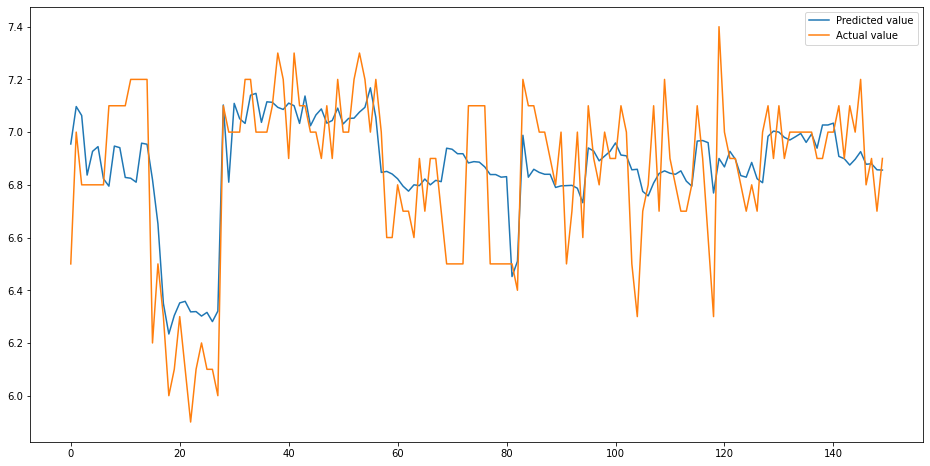

In [19]:
# regressor = RandomForestRegressor()
ind_columns = ['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns
dep_var = 'NoticeSound'
evaluate(RandomForestRegressor(),cv_train, 5, dep_var, ind_columns, False,False,True)

At first glance, it seems that the model can distinguish higher and lower scores, but that it predicts more moderate values than the actual values. 

<h2>How does the number of features influence the performance?</h2>

In [20]:
%%time
ind_columns = ['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns
dep_var = 'NoticeSound'
df_nr_features = pd.DataFrame()

for nr_features in sorted(np.arange(10, 230, 20).tolist()+[1,224]):
    print('* ', nr_features)
    model = RandomForestRegressor(max_features = nr_features)
    
    e = evaluate(model, cv_train, 5, dep_var, ind_columns, False,False,False)
    
    row = {'nr_features': nr_features,
       'run_time(sec)': e[3],
       'r2': e[0],
       'mae': e[1],
       'pearson_r': e[2][0],
       'pearson_power': e[2][1],
    }
    
    df_nr_features = df_nr_features.append(row, ignore_index=True)

*  1
*  10
*  30
*  50
*  70
*  90
*  110
*  130
*  150
*  170
*  190
*  210
*  224
Wall time: 5min 16s


In [24]:
df_nr_features.sort_values(by=['r2', 'pearson_r','mae'], ascending=[False,False,True]).set_index('nr_features')

,mae,pearson_power,pearson_r,r2,run_time(sec)
nr_features,,,,,
30.00,0.17,0.00,0.58,0.34,1.67
50.00,0.17,0.00,0.57,0.34,2.45
130.00,0.17,0.00,0.57,0.34,5.43
90.00,0.17,0.00,0.57,0.33,3.88
150.00,0.17,0.00,0.57,0.33,6.26
70.00,0.17,0.00,0.56,0.33,3.52
110.00,0.17,0.00,0.56,0.33,4.89
170.00,0.17,0.00,0.56,0.33,6.93
190.00,0.17,0.00,0.56,0.33,7.78


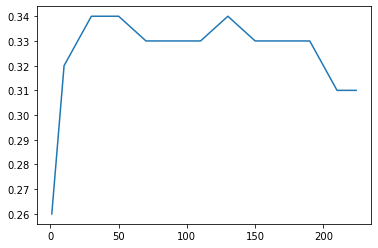

In [25]:
plt.plot(df_nr_features['nr_features'],df_nr_features['r2'])

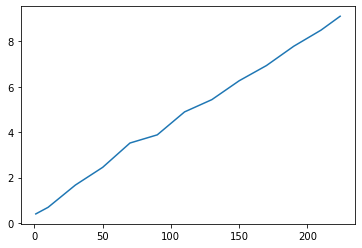

In [26]:
plt.plot(df_nr_features['nr_features'],df_nr_features['run_time(sec)'])

<h2>What about combining two models?</h2>

In [27]:
regdict = {
#     "KNN": neighbors.KNeighborsRegressor(),
    "Lasso":Lasso(),
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
#     "TheilSenRegressor": TheilSenRegressor(), # Takes more than 30min to run and does not have very good results
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),   
}

In [28]:
%%time
comb_model_df = pd.DataFrame()
ind_columns = ['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns
dep_var = 'NoticeSound'
tested_pairs = []

for key1, reg1 in regdict.items():
    print(key1)
    for key2, reg2 in regdict.items():
        if (key1,key2) not in tested_pairs and (key2,key1) not in tested_pairs:
            print('*',key2)
            tested_pairs.append((key1,key2))
        
            if key1 != key2:
                input_model = VotingRegressor(estimators=[(key1, reg1), (key2, reg2)])
            else:
                input_model = reg1

            e = evaluate(input_model, cv_train, 15, dep_var, ind_columns, False, False, False)

            comb_model_df.at[key1, key2] = round(e[0],2)
            comb_model_df.at[key2, key1] = round(e[0],2) # gives the same output

Lasso
* Lasso


C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value enc

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\

* SVR
* NuSVR
* LinearSVR


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* KernelRidge
* LinearRegression
* Ridge
* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet


C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value enc

* OrthogonalMatchingPursuit
XGBRegressor
* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* LinearSVR


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* KernelRidge
* LinearRegression
* Ridge
* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
RandomForestRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* LinearSVR


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* KernelRidge
* LinearRegression
* Ridge
* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
DecisionTreeRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* LinearSVR


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* KernelRidge
* LinearRegression
* Ridge
* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
GaussianProcessRegressor
* GaussianProcessRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\

* SVR
* NuSVR
* LinearSVR


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* KernelRidge
* LinearRegression
* Ridge
* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet


C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\

* OrthogonalMatchingPursuit
SVR
* SVR
* NuSVR
* LinearSVR


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* KernelRidge
* LinearRegression
* Ridge
* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
NuSVR
* NuSVR
* LinearSVR


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* KernelRidge
* LinearRegression
* Ridge
* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
LinearSVR
* LinearSVR


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* KernelRidge


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* LinearRegression


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* Ridge


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


* PassiveAggressiveRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* ARDRegression


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* BayesianRidge


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* ElasticNet


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

* OrthogonalMatchingPursuit


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

KernelRidge
* KernelRidge
* LinearRegression
* Ridge
* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
LinearRegression
* LinearRegression
* Ridge
* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
Ridge
* Ridge
* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
Lars
* Lars


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* ARDRegression


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* BayesianRidge


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* ElasticNet


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


* OrthogonalMatchingPursuit


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 356 iterations, i.e. alpha=8.956e+05, with an active set of 223 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


HuberRegressor
* HuberRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* PassiveAggressiveRegressor


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* ARDRegression


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* BayesianRidge


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* ElasticNet


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

* OrthogonalMatchingPursuit


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

PassiveAggressiveRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
ARDRegression
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
BayesianRidge
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
ElasticNet
* ElasticNet


C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Eigenaar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value enc

* OrthogonalMatchingPursuit
OrthogonalMatchingPursuit
* OrthogonalMatchingPursuit
Wall time: 1h 33min 22s


In [29]:
comb_model_df

,Lasso,XGBRegressor,RandomForestRegressor,DecisionTreeRegressor,GaussianProcessRegressor,SVR,NuSVR,LinearSVR,KernelRidge,LinearRegression,Ridge,Lars,HuberRegressor,PassiveAggressiveRegressor,ARDRegression,BayesianRidge,ElasticNet,OrthogonalMatchingPursuit
Lasso,nan,0.24,0.29,0.12,nan,0.26,0.27,0.13,0.16,0.14,0.16,0.06,0.16,0.12,0.20,0.24,nan,0.25
XGBRegressor,0.24,0.24,0.28,0.21,0.24,0.29,0.30,0.23,0.24,0.22,0.24,0.06,0.24,0.22,0.27,0.30,0.24,0.31
RandomForestRegressor,0.29,0.28,0.29,0.21,0.29,0.31,0.32,0.23,0.24,0.22,0.24,0.06,0.24,0.22,0.27,0.31,0.29,0.31
DecisionTreeRegressor,0.12,0.21,0.21,0.12,0.12,0.19,0.18,0.17,0.18,0.17,0.18,0.06,0.18,0.18,0.19,0.21,0.11,0.20
GaussianProcessRegressor,nan,0.24,0.29,0.12,nan,0.26,0.27,0.13,0.16,0.14,0.16,0.06,0.16,0.13,0.20,0.24,nan,0.25
SVR,0.26,0.29,0.31,0.19,0.26,0.26,0.27,0.18,0.20,0.18,0.20,0.06,0.20,0.19,0.23,0.26,0.26,0.28
NuSVR,0.27,0.30,0.32,0.18,0.27,0.27,0.27,0.19,0.20,0.18,0.20,0.06,0.21,0.21,0.24,0.27,0.27,0.29
LinearSVR,0.13,0.23,0.23,0.17,0.13,0.18,0.19,0.13,0.15,0.14,0.15,0.06,0.14,0.15,0.17,0.19,0.14,0.20
KernelRidge,0.16,0.24,0.24,0.18,0.16,0.20,0.20,0.15,0.16,0.15,0.16,0.06,0.16,0.16,0.18,0.20,0.16,0.21
LinearRegression,0.14,0.22,0.22,0.17,0.14,0.18,0.18,0.14,0.15,0.14,0.15,0.06,0.15,0.16,0.17,0.18,0.14,0.20


In [30]:
topvalue = comb_model_df.max().max()

top_combos = list(comb_model_df.where(comb_model_df.eq(topvalue)).stack().index.values)
print(top_combos)

[('RandomForestRegressor', 'NuSVR'), ('NuSVR', 'RandomForestRegressor')]


<h2>Assess the top performing combination of models</h2>
The combination of RandomForestRegressor and SVR / NuSVR has the highest r2 and one of the lowest errors and the highest pearson correlation. 
An experiment shows that RandomForestRegressor, SVR and NuSVR stabelizes at 5 kfold

('RandomForestRegressor', 'NuSVR')


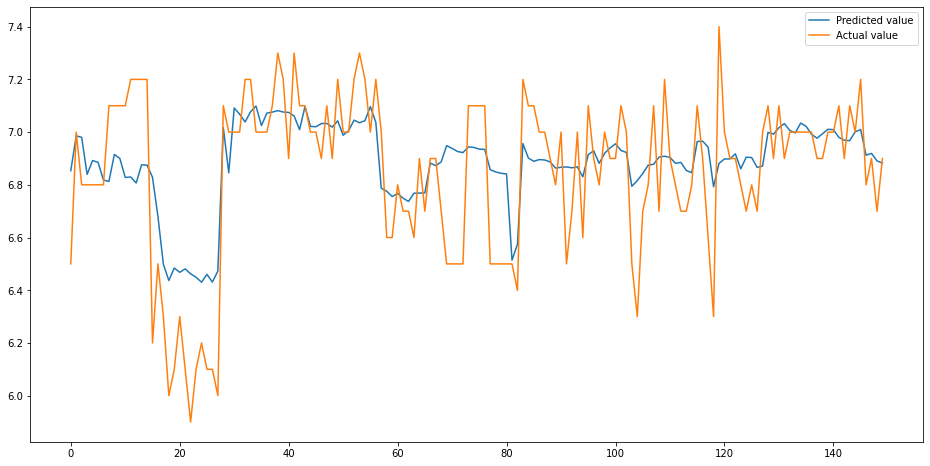

Wall time: 10.4 s


In [31]:
%%time
ind_columns = ['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns
dep_var = 'NoticeSound'
tested_combos = []

for combo in top_combos:
    if combo not in tested_combos and (combo[1], combo[0]) not in tested_combos:
        tested_combos.append(combo)
        if combo[0] == combo[1]:
            print(combo[0])
            input_model = regdict[combo[0]]
        else:
            print(combo)
            input_model = VotingRegressor(estimators=[(combo[0], regdict[combo[0]]), (combo[1], regdict[combo[1]])])

        evaluate(input_model, cv_train, 5, dep_var, ind_columns, False, False, True)

<h3>Hyperparameter tuning Random Forest</h3>
Using RandomizedSearchCV

In [32]:
ind_columns = ['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns
dep_var = 'NoticeSound'

<font color='blue'><h1>Question: Should you tune hyperparameters on only the test set or on the whole data set? If you use fold validation, you use the data you've trained on anyway</h1></font>
Answer: You can train it on the cv_train set. Indeed, your test set also comes from that one when use cross validation. But you still have the final_test set, that is left untouched.

In [ ]:
# %%time

# X_unscaled = cv_train[ind_columns]
# Y_unscaled = cv_train[dep_var]

# # scaling
# ymean = Y_unscaled.mean()
# ystd = Y_unscaled.std()  

# xmean = X_unscaled.mean()
# xstd = X_unscaled.std()  

# Y = (Y_unscaled - ymean) / ystd  
# X = (X_unscaled - xmean) / xstd 

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = [30,50,100,140,'auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(50, 150, num = 10)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10,20]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)


# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X,Y)
# rf_random.best_params_

In [ ]:
# %%time

# base_model = RandomForestRegressor()
# ind_columns = ['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns
# dep_var = 'NoticeSound'

# base_accuracy = evaluate(base_model, cv_train, 5, dep_var, ind_columns, False, True,False)
# print (base_accuracy)

In [ ]:
# best_random = rf_random.best_estimator_
# # best_random = RandomForestRegressor(n_estimators= 1000,
# #  min_samples_split= 5,
# #  min_samples_leaf= 1,
# #  max_features= 'auto',
# #  max_depth= 100,
# #  bootstrap= True)

# ind_columns = ['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns
# dep_var = 'NoticeSound'

# random_accuracy = evaluate(best_random, cv_train, 5, dep_var, ind_columns, False, True,False)
# print(random_accuracy)

In [ ]:
# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy[0] - base_accuracy[0]) / base_accuracy[0]))

<h3>Hyperparameter tuning Random Forest</h3>
Using Grid Search

In [ ]:
# %%time
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [110,120,130],
#     'max_features': [50,60,70],
#     'min_samples_leaf': [1,2,3],
#     'min_samples_split': [7,12,15],
#     'n_estimators': [1150,1200,1250]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 5, n_jobs = -1, verbose = 2)

# # Fit the grid search to the data
# grid_search.fit(X,Y)
# grid_search.best_params_

In [ ]:
# best_grid = grid_search.best_estimator_
# # best_grid= RandomForestRegressor(bootstrap = True,
# #  max_depth= 100,
# #  max_features= 'auto',
# #  min_samples_leaf= 1,
# #  min_samples_split= 5,
# #  n_estimators= 900).fit(X,Y)
# grid_accuracy = evaluate(best_grid, cv_train)

In [ ]:
# print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy[0] - base_accuracy[0]) / base_accuracy[0]))

In [ ]:
# best_grid

<h2>Hyperparameter tuning RandomForestRegressor and NuSVR ensembled</h2>

In [38]:
%%time

X_unscaled = cv_train[ind_columns]
Y_unscaled = cv_train[dep_var]

# scaling
ymean = Y_unscaled.mean()
ystd = Y_unscaled.std()  

xmean = X_unscaled.mean()
xstd = X_unscaled.std()  

Y = (Y_unscaled - ymean) / ystd  
X = (X_unscaled - xmean) / xstd 

            
# random forest parameters    
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [150,180,200,'auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]



#SVR parameters
# set nu
nu = [0.25, 0.5, 0.75]
# set kernel
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
# regularization parameter
C = [i+1 for i in range(10)]
# Set the degree
degree = [i+1 for i in range(5)]
# set de coefficient of the first feature
coef0 = [0, 0.1, .05, 10]
# set the gamma variable
gamma = ['scale','auto']
# Create the random grid

random_grid = {'RandomForest__n_estimators': n_estimators,
               'RandomForest__max_features': max_features,
               'RandomForest__max_depth': max_depth,
               'RandomForest__min_samples_split': min_samples_split,
               'RandomForest__min_samples_leaf': min_samples_leaf,
               'RandomForest__bootstrap': bootstrap,
               'NuSVR__nu':nu,
               'NuSVR__kernel' : kernel,
               'NuSVR__C' : C,
               'NuSVR__degree' : degree,
               'NuSVR__coef0':coef0,
               'NuSVR__gamma' : gamma}

for item in list(random_grid.keys()):
    if item not in list(VotingRegressor(estimators=[('RandomForest', RandomForestRegressor()), ('NuSVR', NuSVR())]).get_params().keys()):
        print(item)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
ens2 = VotingRegressor(estimators=[('RandomForest', RandomForestRegressor()), ('NuSVR', NuSVR())])
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
ens2_random = RandomizedSearchCV(estimator = ens2, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
ens2_random.fit(X,Y)
ens2_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Eigenaar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [ 1.95119710e-01  2.89212205e-01 -3.77125667e-01             nan
 -2.31341822e-01 -1.15721305e-01             nan -2.87216316e-01
 -6.58707308e-01  2.49100168e-01  8.85549066e-02 -1.86004591e-01
 -3.40404954e-02  2.04338906e-01 -2.88817272e-01 -3.73539837e-01
  3.00468207e-01             nan  2.30711834e-01 -5.04715126e-02
  3.06463266e-01             nan  2.37910008e-01  7.37416176e-02
 -2.72484133e+01 -1.43845787e+01 -2.46206858e+01             nan
 -3.07730372e-01  1.01088446e-01 -2.74029995e-01  2.64594609e-01
             nan -3.31832354e-01  1.70503116e-01  1.52923022e-01
 -1.05662032e+00             nan  2.35129716e-01             nan
 -6.63157227e+00  2.55269818e-01 -6.73997093e+01  7.08160644e-02
             nan  3.02538773e-02             nan -3.96827587e+01
             nan  1.44204210e-01             nan             nan
  2.71845

{'RandomForest__n_estimators': 1600,
 'RandomForest__min_samples_split': 10,
 'RandomForest__min_samples_leaf': 1,
 'RandomForest__max_features': 150,
 'RandomForest__max_depth': 20,
 'RandomForest__bootstrap': True,
 'NuSVR__nu': 0.25,
 'NuSVR__kernel': 'rbf',
 'NuSVR__gamma': 'auto',
 'NuSVR__degree': 1,
 'NuSVR__coef0': 0,
 'NuSVR__C': 3}

In [39]:
base_model_ens2 = VotingRegressor(estimators=[('RandomForest', RandomForestRegressor()), ('NuSVR', NuSVR())])

base_accuracy_ens2 = evaluate(base_model_ens2, cv_train, 5, dep_var, ind_columns, False, False, False)
print (base_accuracy_ens2)

(0.33, 0.17, (0.57, 0.0), 9.32)


In [40]:
best_random_ens2 = ens2_random.best_estimator_

random_accuracy_ens2 = evaluate(best_random_ens2, cv_train, 5, dep_var, ind_columns, False, False, False)
print(random_accuracy_ens2)

(0.34, 0.17, (0.57, 0.0), 80.67)


In [41]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy_ens2[0] - base_accuracy_ens2[0]) / base_accuracy_ens2[0]))

Improvement of 3.03%.


<h2>What is the performance of the best performing model, after hyperparameter tuning, on the final_test set?</h2>

In [131]:
# %%time
# ###TEST
# input_model=VotingRegressor(estimators=[('RandomForest', RandomForestRegressor()), ('NuSVR', NuSVR())])
# final_evaluate(input_model, cv_train, final_test, 'NoticeSound', ind_columns, True, True, False)

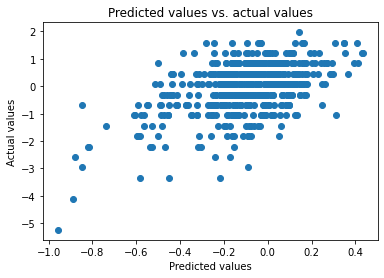

Wall time: 1min 47s


(0.25, 0.63, (0.5, 0.0), 107.02)

In [133]:
%%time
input_model= best_random_ens2
final_evaluate(input_model, cv_train, final_test, 'NoticeSound', ind_columns, True, True, False)

<h2>How does this model perform on an other score that represents the likeability of a song, the Spotify Popularity score?</h2>

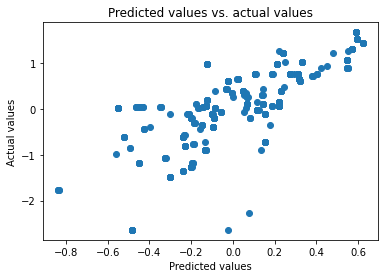

(0.58, 0.52, (0.76, 0.0), 103.78)

In [135]:
final_test = final_test.fillna(final_test.mean())
final_evaluate(input_model, cv_train, final_test, 'S_popularity', ind_columns, True, True, False)

<h2>Baseline (all feature sets used) feature importance for RandomForestRegressor in predicting the NoticeSound score</h2>
TODO: Do this for the randomforest and nusvr ensembled

This can make a prediction for the ablation studies

In [136]:
def give_importance(dep_var, model):
    '''takes the dependent variable and returns a dictionairy of all independent variables and their feature importance'''
    kf = KFold(n_splits=5) # 15 k-fold, since r2 stabelzes at 15 kfold
    importance_dict = {}
    
    ind_columns=['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns
    for feature in ind_columns:
        importance_dict[feature] = []
    
    count=0    
    unique_songs = cv_train[['TitelArtiest']].drop_duplicates()
    for train_index, test_index in kf.split(unique_songs):
        count+=1
        print(count)
        train = unique_songs.iloc[train_index]
        test = unique_songs.iloc[test_index]
        train = cv_train[cv_train['TitelArtiest'].isin(train['TitelArtiest'])]
        test = cv_train[cv_train['TitelArtiest'].isin(test['TitelArtiest'])]


        X_unscaled = train[ind_columns]
        Y_unscaled = train[dep_var]

        # scaling
        ymean = Y_unscaled.mean()
        ystd = Y_unscaled.std()  

        xmean = X_unscaled.mean()
        xstd = X_unscaled.std()  

        Y = (Y_unscaled - ymean) / ystd  
        X = (X_unscaled - xmean) / xstd 

        X_test_unscaled = test[ind_columns]
        Y_test_unscaled = test[dep_var]

        X_test = (X_test_unscaled - xmean) / xstd 
        Y_test = (Y_test_unscaled - ymean) / ystd 
        
        regr = model
        regr.fit(X, Y)
        

        importances = regr.feature_importances_
    #     print(importances)

        for i,v in enumerate(importances):
            value_list = importance_dict[ind_columns[i]] + [v]
            importance_dict[ind_columns[i]] = value_list

    #     print(importance_dict)
        indices = np.argsort(importances)

    for feature, valuelist in importance_dict.items():
        importance_dict[feature] = np.mean(valuelist)
    return(importance_dict)

In [137]:
def most_important(importance_dict, N):
    '''Takes importance_dict from give_importance and returns a dataframe with the N most importan features, their importance
    and from which feature set the feature comes'''
    most_important = dict(Counter(importance_dict).most_common(N))#(sorted(importance_dict, key=importance_dict.get,reverse=True))
    # print(most_important)
    fi_df = pd.DataFrame() #Feature Importance dataframe
    for feature, importance in most_important.items():
        fi_df.at[feature, 'importance'] = importance
        if feature in gracenote_columns:
            fi_df.at[feature, 'feature set'] = 'Gracenote'
        elif feature in radio_columns:
            fi_df.at[feature, 'feature set'] = 'Radio'
        elif feature in musical_features:
            fi_df.at[feature, 'feature set'] = 'Musical features'
        elif feature in lyrical_columns:
            fi_df.at[feature, 'feature set'] = 'Lyrical features'
        elif feature in spotify_columns:
            fi_df.at[feature, 'feature set'] = 'Spotify data'
        elif feature in youtube_columns:
            fi_df.at[feature, 'feature set'] = 'Youtube data'
        elif feature in iTunes_columns:
            fi_df.at[feature, 'feature set'] = 'iTunes data'
        elif feature in weather_columns:
            fi_df.at[feature, 'feature set'] = 'Weather data'
    return(fi_df)

In [144]:
%%time
css = """
.output {
flex-direction: row;
}"""
HTML('<stype>{}</style>'.format(css))

########################## TODO: Make this working for the top performing model!

input_model= RandomForestRegressor()
NS_importance = give_importance('NoticeSound', input_model)
NS_most_imp = (most_important(NS_importance,20), input_model)


SP_importance = give_importance('S_popularity', input_model)
SP_most_imp = (most_important(SP_importance,20))

print('NoticeSound feature importance:')
display(NS_most_imp)
print('Spotify popularity feature importance:')
display(SP_most_imp)

1
2
3
4
5
1
2
3
4
5
NoticeSound feature importance:


(                   importance       feature set
 taal_nl                  0.22  Lyrical features
 total_plays_Q            0.05             Radio
 contrast_var             0.04  Musical features
 occured                  0.04               NaN
 DDVEC                    0.02      Weather data
 YT_views                 0.02      Youtube data
    PG                    0.02      Weather data
   VVN                    0.02      Weather data
 YT_likes                 0.02      Youtube data
    TN                    0.01      Weather data
    SQ                    0.01      Weather data
   VVX                    0.01      Weather data
    DR                    0.01      Weather data
 total_plays_538          0.01             Radio
   RHX                    0.01      Weather data
   FXX                    0.01      Weather data
    UG                    0.01      Weather data
 contrast_mean            0.01  Musical features
   FHN                    0.01      Weather data
 YT_likes_per_view  

Spotify popularity feature importance:


,importance,feature set
YT_views,0.25,Youtube data
YT_views_per_day,0.17,Youtube data
S_tracks_on_album,0.16,Spotify data
YT_likes,0.05,Youtube data
S_duration_ms,0.04,Spotify data
YT_likes_per_day,0.03,Youtube data
YT_comments,0.02,Youtube data
delta_mean,0.01,Musical features
genre_Rap,0.01,Gracenote
tonnetz_m3y_var,0.01,Musical features


Wall time: 1min 18s


<h2>Compare NoticeSound score and Spotify popularity score</h2>
Since the NoticeSound score is not a validated measure, we compare it with an other measure that should represent the same: the Spotify popularity score. An important difference between the Spotify Popularity score an the NoticeSound score is that for the NoticeSound score, values are available per week, while the Spotify Popularity score is a score at a certain moment.
Also, the NoticeSound score is given on a scale from 0 to 5, where the Spotify score is on a scale from 0 to 100. Therefore the scores have to be scaled when they are compared. 

Standard scaling is used.

pearson value =  0.31
pearson power =  0.0
There is a significant correlation of 0.31 between the NoticeSound and Spotify Popularity score, since P<0.05.


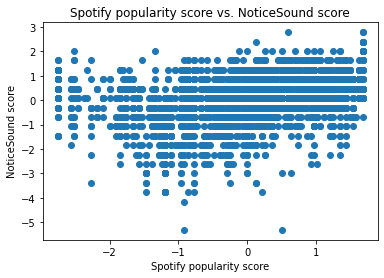

NoticeSound shapiro statistic = 0.95, p-value= 0.0
Spotify popularity shapiro statistic = 0.96, p-value= 0.0
For both values the p value < 0.05, so the null hypothesis that the variables are normally distributed is rejected.
 
Since the data is not normally distributed, we use the Wilcoxon signed-rank Test to test whether the normalized scores differ.
WilcoxonResult(statistic=6017.5, pvalue=0.0)
Hence, we would reject the null hypothesis at a confidence level of 5%, concluding that there is a difference in values between the variables.


In [145]:
#NoticeSound Score
NS_unscaled = data['NoticeSound']

# scaling
NSmean = NS_unscaled.mean()
NSstd = NS_unscaled.std()  
NS = (NS_unscaled - NSmean) / NSstd  

#Spotify Popularity
SP_unscaled = data['S_popularity']

# scaling
SPmean = SP_unscaled.mean()
SPstd = SP_unscaled.std()  
SP = (SP_unscaled - SPmean) / SPstd  

# Metrics to compare
correlation_matrix = np.corrcoef(NS, SP)
correlation_xy = correlation_matrix[0,1]

r2 = correlation_xy**2
mae= metrics.mean_absolute_error(NS, SP)
pearson = stats.pearsonr(NS, SP)


print("pearson value = ", round(pearson[0],2))
print("pearson power = ", round(pearson[1],2))
print("There is a significant correlation of 0.31 between the NoticeSound and Spotify Popularity score, since P<0.05.")


# Plot normalised features against each other
plt.scatter(SP, NS)
plt.title("Spotify popularity score vs. NoticeSound score")
plt.xlabel("Spotify popularity score")
plt.ylabel("NoticeSound score")
plt.show()

print(f"NoticeSound shapiro statistic = {round(stats.shapiro(NS_unscaled)[0],2)}, \
p-value= {round(stats.shapiro(NS_unscaled)[1],2)}")
print(f"Spotify popularity shapiro statistic = {round(stats.shapiro(SP_unscaled)[0],2)}, \
p-value= {round(stats.shapiro(SP_unscaled)[1],2)}")
print("For both values the p value < 0.05, \
so the null hypothesis that the variables are normally distributed is rejected.")
print(" ")
print("Since the data is not normally distributed, \
we use the Wilcoxon signed-rank Test to test whether the normalized scores differ.")

print(wilcoxon(x=NS_unscaled, y=SP_unscaled))
print("Hence, we would reject the null hypothesis at a confidence level of 5%, \
concluding that there is a difference in values between the variables.")

<font color='red'><h1>Question: Now the baseline model is defined, can I run the ablation experiment on my whole data set?</h1></font>

<h2>Ablation experiment</h2>
Predict the NoticeSound score and Spotify popularity score by leaving out feature sets one by one.

- None means that there are no feature sets left out
- Two "special" sets are added:
    - 'Features caused by popularity' - Since they can be a cofounder of both the NoticeSound and Spotify popularity score, it is interesting to evaluate how the model perfoms without them
    - 'Features generated by commercial parties' - If we want to know the likeability score of a song that is not published yet, we can not use data from Spotify, YouTube, iTunes and Gracenote. It is interesting to see how the model would perform if only the musical features, lyrical features and the weather are used to predict the potential score.

In [175]:
feature_sets = [[['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns],
               [gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns], # occured
               [['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns], # weather
               [['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+weather_columns],#itunes
               [['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+spotify_columns+iTunes_columns+weather_columns],#youtube
               [['occured']+gracenote_columns+radio_columns+musical_features+lyrical_columns+youtube_columns+iTunes_columns+weather_columns],#spotify
               [['occured']+gracenote_columns+radio_columns+musical_features+spotify_columns+youtube_columns+iTunes_columns+weather_columns], #lyrics
               [['occured']+gracenote_columns+radio_columns+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns], # musical features
               [['occured']+gracenote_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns], # radio
               [['occured']+radio_columns+musical_features+lyrical_columns+spotify_columns+youtube_columns+iTunes_columns+weather_columns],#gracenote 
               [['occured']+gracenote_columns+musical_features+lyrical_columns+spotify_columns+weather_columns], #'Features caused by popularity' 
               [['occured']+musical_features+lyrical_columns+weather_columns]]
missing_sets = ['None', 'occured','weather','iTunes','YouTube', 'Spotify', 'lyrics', 'musical features', 'radio', 'Gracenote', 'Features caused by popularity', 'Features generated by commercial parties']

In [176]:
dep_columns = ['NoticeSound','S_popularity']

To compare Spotify and NoticeSound, we use the scaled predicted variables

In [177]:
%%time
import copy

input_model= best_random_ens2
# print(input_model)
scaleddf = pd.DataFrame()
# print(input_model.get_params()['RandomForest__max_features'])

for j in range(len(feature_sets)):
    ft_name = missing_sets[j]
    ind_columns = feature_sets[j][0]

    print(ft_name)
    for dep_var in dep_columns:
        print("* ",dep_var)
        if len(ind_columns) < input_model.get_params()['RandomForest__max_features']:
            new_input_model = copy.deepcopy(input_model)
            new_input_model.set_params(**{'RandomForest__max_features':len(ind_columns)})

            e = evaluate(new_input_model, data, 5, dep_var, ind_columns, True, False, False)
        else:
            e = evaluate(input_model, data, 5, dep_var, ind_columns, True, False, False)
        
        row = {'missing set': ft_name,
               'depvar' : dep_var,
               'r2': e[0],
               'mae': e[1],
               'pearson cor': e[2][0],
               'pearson p': e[2][1],
                'run_time(sec)': e[3]
              }
#         print(row)
        
        scaleddf = scaleddf.append(row, ignore_index=True)

None
*  NoticeSound
*  S_popularity
occured
*  NoticeSound
*  S_popularity
weather
*  NoticeSound
*  S_popularity
iTunes
*  NoticeSound
*  S_popularity
YouTube
*  NoticeSound
*  S_popularity
Spotify
*  NoticeSound
*  S_popularity
lyrics
*  NoticeSound
*  S_popularity
musical features
*  NoticeSound
*  S_popularity
radio
*  NoticeSound
*  S_popularity
Gracenote
*  NoticeSound
*  S_popularity
Features caused by popularity
*  NoticeSound
*  S_popularity
Features generated by commercial parties
*  NoticeSound
*  S_popularity
Wall time: 4h 33min 52s


In [178]:
scaleddf
NS_base = scaleddf[(scaleddf['missing set'] == 'None')&(scaleddf['depvar']=='NoticeSound')]
print(NS_base)
SP_base = scaleddf[(scaleddf['missing set'] == 'None')&(scaleddf['depvar']=='S_popularity')]
print(SP_base)

        depvar  mae missing set  pearson cor  pearson p   r2  run_time(sec)
0  NoticeSound 0.65        None         0.56       0.00 0.32         119.85
         depvar  mae missing set  pearson cor  pearson p   r2  run_time(sec)
1  S_popularity 0.55        None         0.66       0.00 0.45         100.99


In [180]:
#### > verschil met baseline ipv r2
NS_baseline = {'r2' : NS_base['r2'],
               'mae' : NS_base['mae'], 
               'pearson_cor' : NS_base['pearson cor'],
               'pearson p' : NS_base['pearson p'],
               'run_time(sec)' : NS_base['run_time(sec)']}

SP_baseline = {'r2' : SP_base['r2'],
               'mae' : SP_base['mae'], 
               'pearson_cor' : SP_base['pearson cor'],
               'pearson p' : SP_base['pearson p'],
               'run_time(sec)' : SP_base['run_time(sec)']}

print("NoticeSound score baseline:")
# print(f'r2= {0.33}, mae={0.17}, pearson correlation= {0.70}, pearson p ={0.00}')
print(NS_baseline)
print("")
print("Spotify popularity baseline:")
# print(f'r2= {0.48}, mae={10.59}, pearson correlation= {0.84}, pearson p ={0.00}')
print(SP_baseline)

print("")
ablationdf = scaleddf.copy()
for index,row in ablationdf.iterrows():
    
    if row['depvar'] == 'NoticeSound':
        ablationdf.at[index,'r2'] = row['r2'] - NS_baseline['r2']
        ablationdf.at[index,'mae'] = row['mae'] - NS_baseline['mae']
        ablationdf.at[index,'pearson cor'] = row['pearson cor'] - NS_baseline['pearson_cor']
        ablationdf.at[index,'pearson p'] = row['pearson p'] - NS_baseline['pearson p']
        
    if row['depvar'] == 'S_popularity':
        ablationdf.at[index,'r2'] = row['r2'] - SP_baseline['r2']
        ablationdf.at[index,'mae'] = row['mae'] - SP_baseline['mae']
        ablationdf.at[index,'pearson cor'] = row['pearson cor'] - SP_baseline['pearson_cor']
        ablationdf.at[index,'pearson p'] = row['pearson p'] - SP_baseline['pearson p']

left = ablationdf[ablationdf['depvar'] == 'NoticeSound']
right = ablationdf[ablationdf['depvar'] == 'S_popularity']
ablationdf = pd.merge(left, right, on="missing set", suffixes=("_NS", "_SP")).set_index('missing set')

ablationdf = ablationdf[['r2_NS','r2_SP', 'mae_NS', 'mae_SP', 'pearson cor_NS','pearson cor_SP', 'pearson p_NS','pearson p_SP']]
ablationdf = round(ablationdf,2)

title="Difference with baseline model for NoticeSound score and Spotify Popularity when certain feature sets are left out"
print(title)
round(ablationdf,2)
# .style.set_caption()

NoticeSound score baseline:
{'r2': 0   0.32
Name: r2, dtype: float64, 'mae': 0   0.65
Name: mae, dtype: float64, 'pearson_cor': 0   0.56
Name: pearson cor, dtype: float64, 'pearson p': 0   0.00
Name: pearson p, dtype: float64, 'run_time(sec)': 0   119.85
Name: run_time(sec), dtype: float64}

Spotify popularity baseline:
{'r2': 1   0.45
Name: r2, dtype: float64, 'mae': 1   0.55
Name: mae, dtype: float64, 'pearson_cor': 1   0.66
Name: pearson cor, dtype: float64, 'pearson p': 1   0.00
Name: pearson p, dtype: float64, 'run_time(sec)': 1   100.99
Name: run_time(sec), dtype: float64}

Difference with baseline model for NoticeSound score and Spotify Popularity when certain feature sets are left out


,r2_NS,r2_SP,mae_NS,mae_SP,pearson cor_NS,pearson cor_SP,pearson p_NS,pearson p_SP
missing set,,,,,,,,
None,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
occured,-0.01,0.00,0.00,0.00,-0.01,0.00,0.00,0.00
weather,-0.02,0.00,0.00,0.00,-0.02,0.00,0.00,0.00
iTunes,0.00,0.00,0.00,-0.01,-0.01,0.00,0.00,0.00
YouTube,-0.04,-0.26,0.02,0.16,-0.04,-0.22,0.00,0.00
Spotify,-0.01,-0.09,0.00,0.04,-0.01,-0.07,0.00,0.00
lyrics,-0.06,-0.02,0.02,0.01,-0.06,-0.02,0.00,0.00
musical features,-0.02,-0.04,0.01,0.02,-0.02,-0.03,0.00,0.00
radio,-0.02,0.00,0.01,0.00,-0.02,0.00,0.00,0.00


We can see a few things:

- In this model, the prediction of the Spotify Popularity score relies more on features caused by popularity than the NoticeSound score
- The NoticeSound score relies on lyrics, but the Spotify popularity model predicts better when musical features are left out.
- The original model was trained on the NoticeSound data, and leaving out feature sets has more impact on the model predicting the Spotify popularity score

In [181]:
print('Performance when certain feature sets are left out')
scaleddf.groupby(['missing set','depvar']).mean().round(2)


Performance when certain feature sets are left out


mae  pearson cor  \
missing set                              depvar                           
Features caused by popularity            NoticeSound  0.69         0.49   
                                         S_popularity 0.72         0.40   
Features generated by commercial parties NoticeSound  0.69         0.48   
                                         S_popularity 0.80         0.18   
Gracenote                                NoticeSound  0.65         0.56   
                                         S_popularity 0.57         0.63   
None                                     NoticeSound  0.65         0.56   
                                         S_popularity 0.55         0.66   
Spotify                                  NoticeSound  0.65         0.55   
                                         S_popularity 0.59         0.59   
YouTube                                  NoticeSound  0.67         0.52   
                                         S_popularity 0.71         0.44   
iTunes                                   NoticeSound  0.65         0.55   
                                         S_popularity 0.54         0.66   
lyrics                                   NoticeSound  0.67         0.50   
                                         S_popularity 0.56         0.64   
musical features                         NoticeSound  0.66         0.54   
                                         S_popularity 0.57         0.63   
occured                                  NoticeSound  0.65         0.55   
                                         S_popularity 0.55         0.66   
radio                                    NoticeSound  0.66         0.54   
                                         S_popularity 0.55         0.66   
weather                                  NoticeSound  0.65         0.54   
                                         S_popularity 0.55         0.66   

                                                       pearson p   r2  \
missing set                              depvar                         
Features caused by popularity            NoticeSound        0.00 0.24   
                                         S_popularity       0.00 0.16   
Features generated by commercial parties NoticeSound        0.00 0.24   
                                         S_popularity       0.04 0.05   
Gracenote                                NoticeSound        0.00 0.32   
                                         S_popularity       0.00 0.43   
None                                     NoticeSound        0.00 0.32   
                                         S_popularity       0.00 0.45   
Spotify                                  NoticeSound        0.00 0.31   
                                         S_popularity       0.00 0.36   
YouTube                                  NoticeSound        0.00 0.28   
                                         S_popularity       0.00 0.19   
iTunes                                   NoticeSound        0.00 0.32   
                                         S_popularity       0.00 0.45   
lyrics                                   NoticeSound        0.00 0.26   
                                         S_popularity       0.00 0.43   
musical features                         NoticeSound        0.00 0.30   
                                         S_popularity       0.00 0.41   
occured                                  NoticeSound        0.00 0.31   
                                         S_popularity       0.00 0.45   
radio                                    NoticeSound        0.00 0.30   
                                         S_popularity       0.00 0.45   
weather                                  NoticeSound        0.00 0.30   
                                         S_popularity       0.00 0.45   

                                                       run_time(sec)  
missing set                              depvar                       
Features caused by popularity            NoticeSound          1

<h2>How well can every feature set on his own predict the NoticeSound score and Spotify popularity?</h2>

In [182]:
feature_sets = [['occured']+gracenote_columns,
                ['occured']+radio_columns,
                ['occured']+musical_features,
                ['occured']+lyrical_columns,
                ['occured']+spotify_columns,
                ['occured']+youtube_columns,
                ['occured']+iTunes_columns,
                ['occured']+weather_columns]
               
used_sets = ['Gracenote', 'radio','musical features', 'lyrics','Spotify','YouTube','iTunes', 'weather']

In [186]:
%%time

input_model= best_random_ens2
per_featureset_df = pd.DataFrame()

for j in range(len(feature_sets)):
    ft_name = used_sets[j]
    ind_columns = feature_sets[j]
    print(ft_name)
    
    for dep_var in dep_columns:        
        print('* ', dep_var)
        if len(ind_columns) < input_model.get_params()['RandomForest__max_features']:
            new_input_model = copy.deepcopy(input_model)
            new_input_model.set_params(**{'RandomForest__max_features':len(ind_columns)})

            e = evaluate(new_input_model, data, 5, dep_var, ind_columns, True, False, False)
        else:
            e = evaluate(input_model, data, 5, dep_var, ind_columns, True, False, False)
        
        row = {'feature set': ft_name,
               'depvar' : dep_var,
               'r2': e[0],
               'mae': e[1],
               'pearson cor': e[2][0],
               'pearson p': e[2][1],
                'run_time(sec)': e[3]
              }
        
        per_featureset_df = per_featureset_df.append(row, ignore_index=True)

Gracenote
*  NoticeSound
*  S_popularity
radio
*  NoticeSound
*  S_popularity
musical features
*  NoticeSound
*  S_popularity
lyrics
*  NoticeSound
*  S_popularity
Spotify
*  NoticeSound
*  S_popularity
YouTube
*  NoticeSound
*  S_popularity
iTunes
*  NoticeSound
*  S_popularity
weather
*  NoticeSound
*  S_popularity
Wall time: 24min 47s


In [188]:
per_featureset_df.groupby(['feature set','depvar']).mean().round(2)


mae  pearson cor  pearson p   r2  run_time(sec)
feature set      depvar                                                       
Gracenote        NoticeSound  0.77         0.31       0.00 0.10          24.06
                 S_popularity 0.83         0.08       0.06 0.02          25.38
Spotify          NoticeSound  0.82         0.05       0.10 0.01           6.53
                 S_popularity 0.82         0.19       0.16 0.05           6.17
YouTube          NoticeSound  0.72         0.39       0.00 0.15          13.38
                 S_popularity 0.59         0.52       0.00 0.31          12.89
iTunes           NoticeSound  0.80         0.16       0.06 0.03           5.26
                 S_popularity 0.80         0.20       0.19 0.06           5.20
lyrics           NoticeSound  0.73         0.41       0.00 0.17          16.28
                 S_popularity 0.78         0.24       0.00 0.06          15.36
musical features NoticeSound  0.78         0.17       0.02 0.03          67.05
                 S_popularity 0.86        -0.01       0.37 0.00          65.31
radio            NoticeSound  0.77         0.21       0.00 0.05           4.58
                 S_popularity 0.79         0.21       0.01 0.05           4.16
weather          NoticeSound  0.78         0.17       0.00 0.03          12.40
                 S_popularity 0.82         0.02       0.38 0.01          12.14